# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## 1.) Dataset Exploration

### Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:",X_train.shape)
print("Data loaded")



X_train shape: (34799, 32, 32, 3)
Data loaded


---

### 1.1 Dataset Summary & Exploration

Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test =len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


The dataset contains 43 different classes fo german traffic signs.  
The data set has 34799 training expamples, 4410 validation examples and 12630 exmaples for testing.

| Dataset    | Percent |
|:------------|--------:|
| Train    | 67,1 % |
| Validation |  8,5 % |
| Testing    | 24,4 % |


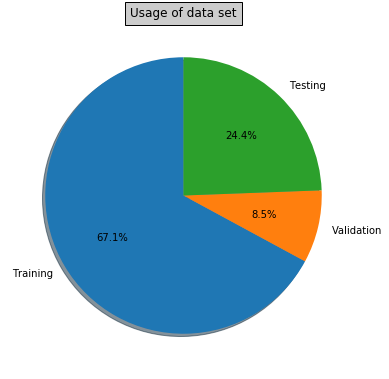

In [3]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Training', 'Validation', 'Testing'
fracs = [67.1, 8.5, 24.4]

pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)# The default startangle is 0
title('Usage of data set', bbox={'facecolor':'0.8', 'pad':5})

show()

### 1.2 Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?


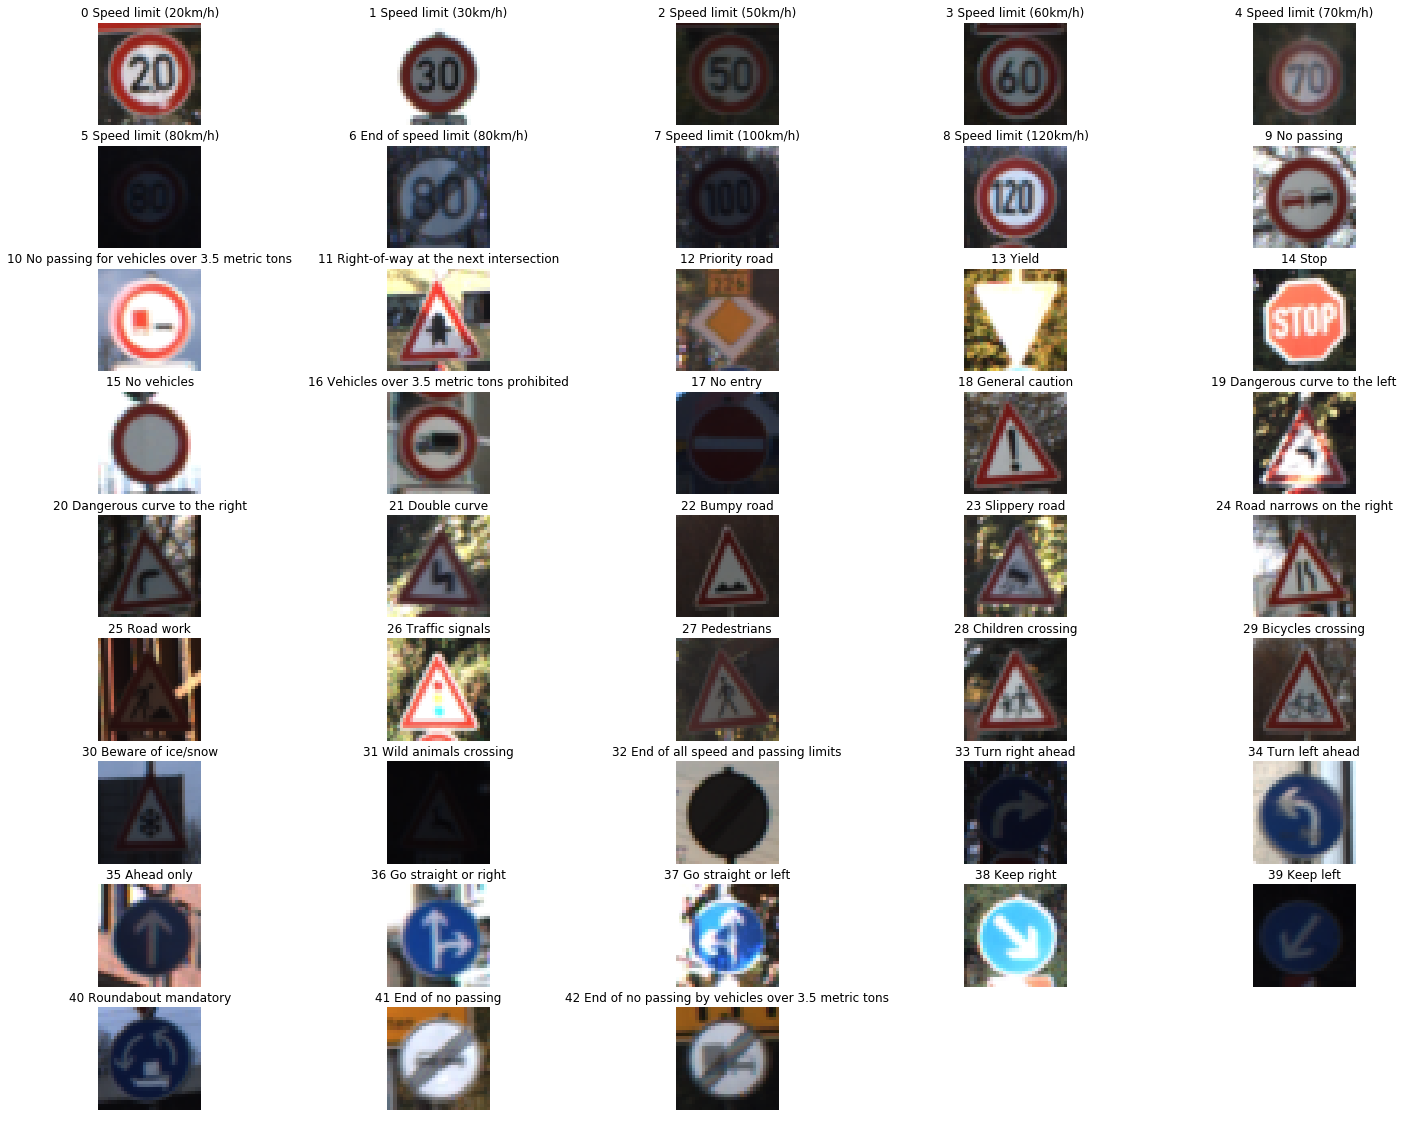

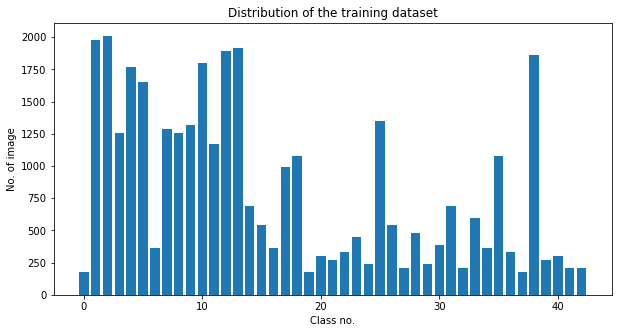

Minimum count of images per class = 180
Maximum count of images per class = 2010


In [4]:
from random import randint

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import pandas as pd
signs = pd.read_csv('signnames.csv', sep=',',header=None)

count_classes=[]
plt.figure(figsize=(25, 20))
# Loop over all Image Classes 0..42 = 43
ran = randint(0,180) # 180 is the minimum count of all classes
for i in range(0, n_classes):
    # subplot(nrows, ncols, plot_number)
    plt.subplot(9, 5, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[ran]) # show a random image of each class
    mytitle = str(i) + ' ' + signs.values[i,1] 
    plt.title( mytitle )
    plt.axis('off')
    count_classes.append(len(x_selected))
plt.show()

# Plot the count of images per class
plt.figure(figsize=(10, 5))
plt.bar( range( 0, n_classes), count_classes )
plt.xlabel("Class no.")
plt.ylabel("No. of image")
plt.title("Distribution of the training dataset")
plt.show()

print("Minimum count of images per class =", min(count_classes))
print("Maximum count of images per class =", max(count_classes))


**One random image per class is displayed and labelled with the correspondig class:**

**The bar chart shows the distribution of training expamples per class **

Bumpy road
Randomly chosen 20 out of 330


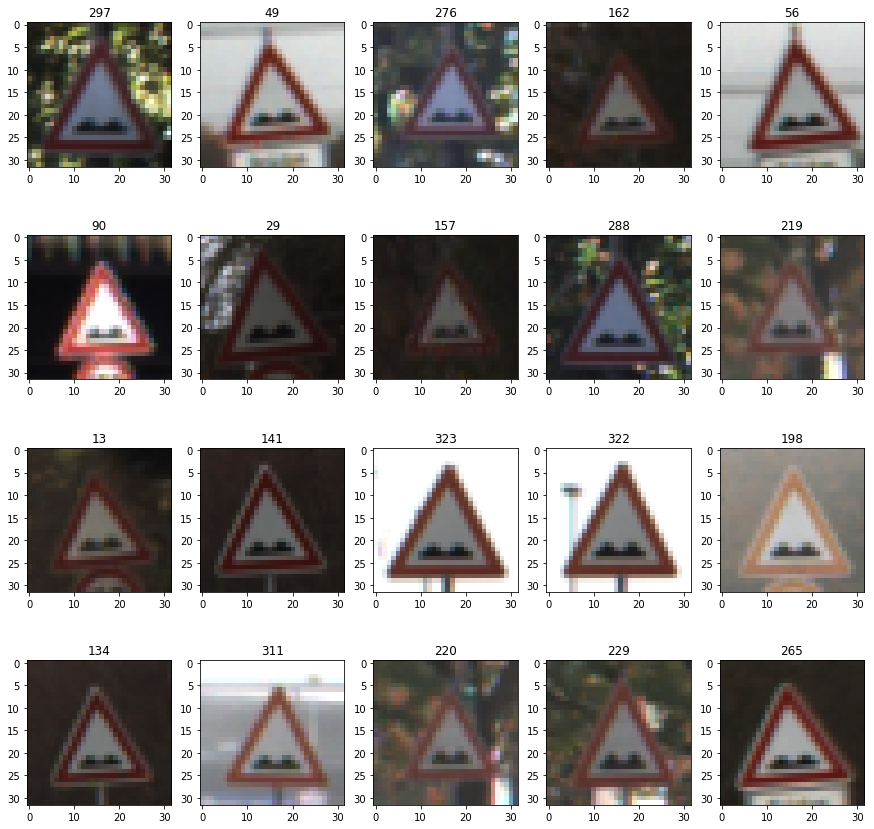

In [5]:

# for Debuging purposes 
# 'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
# print(X_train.shape)
# print(y_train.shape)

# Show 20 random signs of one random class
ran = randint(0,n_classes)
print(signs.values[ran,1])
x_selected = X_train[y_train == ran]
#x_selected = X_valid[y_valid == ran]
# number of imagaes in this class
length = len(x_selected)
print('Randomly chosen 20 out of' , length)
plt.figure(figsize=(15, 15))

for i in range(0, 20):
    plt.subplot(4, 5, i+1)
    imgrand = randint(0,length)
    plt.title(imgrand)
    plt.imshow(x_selected[imgrand])



----

## 2.) Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 2.1 Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

## Implementation of preprocessing  ##

At first the images have been converted to grayscale. But the training results got worse and so it was not implemented in the preprocessing pipeline.

Next Histogram equalization has been tried, but the reult was not as good as the normalization.

Then different types of normalization has been tried. Best results wer achieved with the _cv2.normalize_ function.

Many images in the test data set are rotated, so the training set was enhanced wiht random rotated images.

The pipeline looks like this:

- loop over all training images
  - normalize image
  - add 2x times the amount with randomly rotated images
 
 
- loop over all validation images
  - normalize image
  
  
- loop over all test images
  - normalize image


In [6]:
# Load pickled data again for clean and fresh start
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:",X_train.shape)
print("Data loaded")


### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def random_rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = random.randint(-15, 15)
    #print('rand angle',ang)
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

# grayscaling made the results worse
def grayscale(img):
    # Applies the Grayscale transform
    shape = img.shape    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((shape[0],shape[1],1))
    return img


# Tried diffent types of normalisations
def normalize(data):

    # variant 1 - result not good
    # return data / 255 * 0.8 + 0.1  
    
    # Variant 2 - better
    # return data - data.mean()/data.std() # better

    # Variant 3 - similar to Variant 2, slightly better than 2
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(data, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_image


# Histogram equalization made the results worse
def histequal(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    #cv2.imshow('Color input image', img)
    #cv2.imshow('Histogram equalized', img_output)
    return img_output

# process array of images
def preprocess(data, typ):
    processed_images = []
    # Process all images, just normalize existing images
    for image in data:    
        # before
        #print('original')
        #plt.imshow(image)
        #plt.show()
        image_p = normalize(image)                
        processed_images.append(image_p)  
        #print('normalized')
        #plt.imshow(image_p)
        #plt.show()  
    
    # add additional training data
    if typ == 'train':
        for image in data: 
            # randomly rotate the image
            image_p = random_rotate_img(image) 
            # after processing
            #print('orignal rotated')
            #plt.imshow(image_p)
            #plt.show()
            # normalize it
            image_p = normalize(image_p)        
            # after processing
            #print('orignal rotated and normalized')
            #plt.imshow(image_p)
            #plt.show()
            processed_images.append(image_p)             

        # add more training data
        for image in data: 
            image_p = random_rotate_img(image) 
            image_p = normalize(image_p)        
            processed_images.append(image_p) 
            
    return np.array(processed_images)

# initialize images for next test

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
index = random.randint(1,len(X_train))
#X_train = preprocess(X_train[index:index+3],'train')
X_train = preprocess(X_train,'train')
X_valid = preprocess(X_valid,'valid')
X_test = preprocess(X_test,'test')
y_train2 = y_train
y_train = np.append(y_train,y_train2)
y_train = np.append(y_train,y_train2)
#plt.imshow(X_train[47000])

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

print('Preprocessing finished!')

X_train shape: (34799, 32, 32, 3)
Data loaded
X_train shape (34799, 32, 32, 3)
y_train shape (34799,)
X_train shape (104397, 32, 32, 3)
y_train shape (104397,)
Preprocessing finished!


Indices over 34799 are rotated images
7507


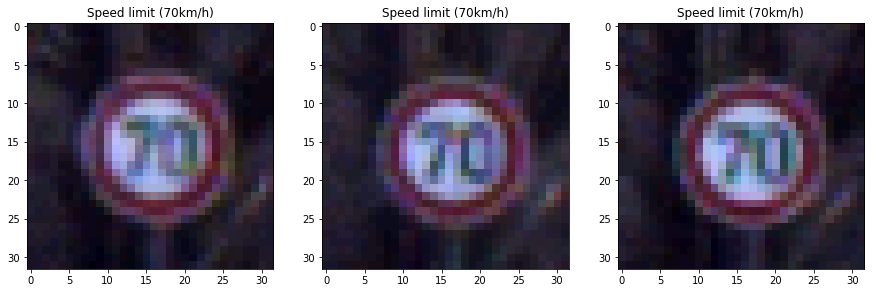

In [7]:
# check results of preprocessed images for debugging
import random
index = random.randint(1,len(X_train))
print("Indices over 34799 are rotated images")
print(index)
number_of_images = 3
ind=1
plt.figure(figsize=(15, 5))
for i in range(index, index + number_of_images):
    plt.subplot(1, 3, ind)  
    plt.title(  signs.values[ y_train[i], 1 ] )           
    plt.imshow(X_train[i])
    ind+=1
plt.show()




### 2.2 Model Architecture

### Implementation of LeNet-5
I used a 1:1 Implementation of LeNet-5. It aleady comes up with >93% validation accuracy when Drop outs are added.

#### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.
C is 3 in this case because we use color images.

#### Architecture

The LeNet-5 Model has been used enhaced with 2 Drop Out Layers to prevent overfitting.

|Layer Name|Description|
|:-----|:--------|
|Layer 1: Convolutional| The output shape should be 28x28x6.|
|Activation.| Relu used as activation function.|
|Pooling.| The output shape should be 14x14x6|
|Layer 2: Convolutional.| The output shape should be 10x10x16.|
|Activation.| Your choice of activation function.|
|Pooling.| The output shape should be 5x5x16.|
|Flatten.| Flatten the output shape of the final pooling layer such that it's 1D instead of 3D|
|Layer 3: Fully Connected.| This should have 120 outputs.|
|Activation Layer 3.| Relu used as activation function.|
|** Dropout Layer 3 **| To prevent overfitting a droupout function was added|
|Layer 4: Fully Connected.| This should have 84 outputs.|
|Activation Layer 4.| Relu used as activation function.|
| **Dropout Layer 4 **| To prevent overfitting a droupout function was added|
|Layer 5: Fully Connected (Logits).| This should have 10 outputs.|

#### Output
Return the result of the 2nd fully connected layer (Layer 5).


## Hyperparameters ##
* **BATCH SIZE** of 128 was running without memory problems and has not been changed
* **DROP OUTS**: Best results are achieved with a keep probabilty of 0.5.
* Values for **EPOCH**s With a learning rate of 0.001 Epcohs >50 don't lead to significantly better results due overfitting than value of 10. Even 5 would be sufficient for this case. For learning rate of 0.0005 I choosed 60 epochs.
* Different values for the **learning rate** have been tried. A rate of 0.0005 leads to the best results in combination with a large number of Epochs


In [74]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

## Setup TensorFlow
## The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

EPOCHS = 60 # 10 # 5 enough
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x6.
    # # (height, width, input_depth, output_depth)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6 = 4704; Output = 14x14x6 = 1176
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # DROPOUT
    fc2  = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # DROPOUT
    fc2  = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


## Features and Labels ##
Train LeNet to classify data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [75]:
# From conv2 docs
# shape of input = [batch, in_height, in_width, in_channels]
# shape of filter = [filter_height, filter_width, in_channels, out_channels]
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units


### 2.3 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. 
A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [77]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0005 # starting value was 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation ##
Evaluate how well the loss and accuracy of the model for a given dataset.


In [78]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [79]:
# Helper function to plot the learning curve
def show_learning_curve(epochs, train, valid):
    plt.figure(figsize=(5, 5))
    plt.figure(figsize=(10, 10))
    plt.plot(epochs, valid, label='validation')
    plt.plot(epochs, train, label='training')
    plt.title('Learning Curve')
    plt.ylabel('Validation accuracy')
    #plt.plot(epochs, train, valid, label='training')
    #plt.ylabel('Training accuracy')
    plt.xlabel('Epochs')
    plt.xticks(epochs)
    plt.legend(loc='center right')
    plt.ylim([0.85,1])
    plt.show()
#show_learning_curve(epochs, training_scores, validation_scores)

In [80]:
from sklearn.utils import shuffle
validation_scores=[]
training_scores=[]
epochs=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training with %d images ..." % num_examples)
    print("Training in %d Epochs" % EPOCHS)
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print('Training Accuracy = {:.3f}'.format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        
        print()
        validation_scores.append(validation_accuracy)
        training_scores.append(train_accuracy)
        epochs.append(i+1),
        
    saver.save(sess, './lenet')
    print("Model saved")


Training with 104397 images ...
Training in 60 Epochs

EPOCH 1 ...
Training Accuracy = 0.862
Validation Accuracy = 0.799

EPOCH 2 ...
Training Accuracy = 0.932
Validation Accuracy = 0.870

EPOCH 3 ...
Training Accuracy = 0.961
Validation Accuracy = 0.901

EPOCH 4 ...
Training Accuracy = 0.969
Validation Accuracy = 0.910

EPOCH 5 ...
Training Accuracy = 0.979
Validation Accuracy = 0.918

EPOCH 6 ...
Training Accuracy = 0.985
Validation Accuracy = 0.922

EPOCH 7 ...
Training Accuracy = 0.987
Validation Accuracy = 0.926

EPOCH 8 ...
Training Accuracy = 0.990
Validation Accuracy = 0.931

EPOCH 9 ...
Training Accuracy = 0.992
Validation Accuracy = 0.939

EPOCH 10 ...
Training Accuracy = 0.993
Validation Accuracy = 0.938

EPOCH 11 ...
Training Accuracy = 0.995
Validation Accuracy = 0.932

EPOCH 12 ...
Training Accuracy = 0.995
Validation Accuracy = 0.933

EPOCH 13 ...
Training Accuracy = 0.996
Validation Accuracy = 0.942

EPOCH 14 ...
Training Accuracy = 0.997
Validation Accuracy = 0.935

EP

**Visualize the performance**

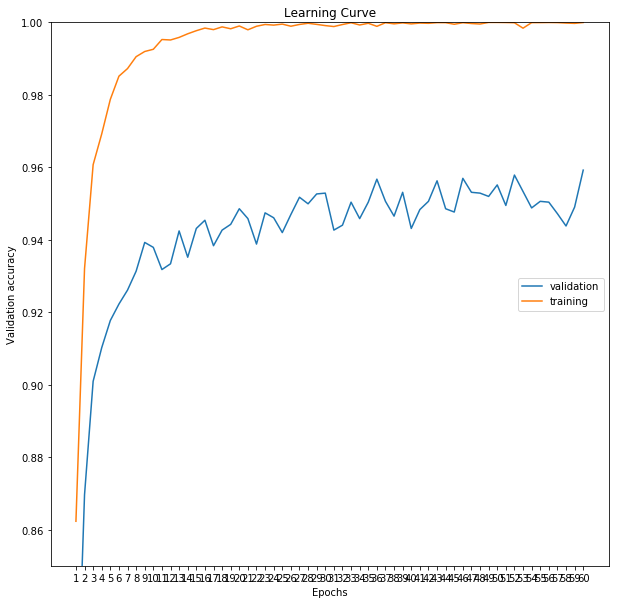

In [81]:
show_learning_curve(epochs, training_scores, validation_scores)

Although Drop Outs are added, the model tends to overfit the data.

### Evaluate the Model ###
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.


In [82]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.950


### 2.4 Solution Approach and Final Result

The final model has 95% accuracy and is above the requested 93% accuracy for the test data.

These development steps have been made:

- Implementing the LeNet-5 Architecture.   
  Result: <88 % on validation data
- Adding Dropouts  
  Result; ~ 91 % on validation data
- Adding more and randomly rotated training images to have 3 times as much data for training  
  Result 94 % on validation data
- Increased the Learning Rate from 0.001 to 0.005  
  Result: Overfitting, very different results in each epoch
-Decreased the learning rate form 0.001 to 0.0005  
  Result: needs many more epochs ~30 to get nearly the same result as with standard learning rate
- Learning rate was set back to default of 0.001
- Trying different number of Epochs 5,10,20,50,80   
- Scaled the images and make them bigger  
  Result: Performance got worse+
- No big improvements about 10 epochs with constnat learning rate of 0.001
- There are still little improvements possible with more epchs and smaller learning rate


#### Final Hyperparameters  
|Parameter| Value|
|:----|----:|
|Epochs| 60|
|Batch Size|128|
|Learning rate| 0.0005|
|Drop Outs| 0.5|

More detailed test results can be found here: [results.xlsx](./results.xlsx)


---

## 3.) Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 3.1) Load, Preprocess and Output the new Images

5 test images are taken from the internet.

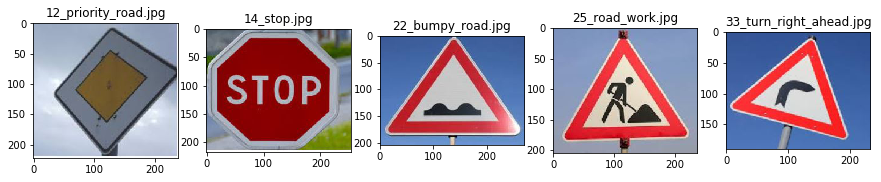

Images resized to 32x32


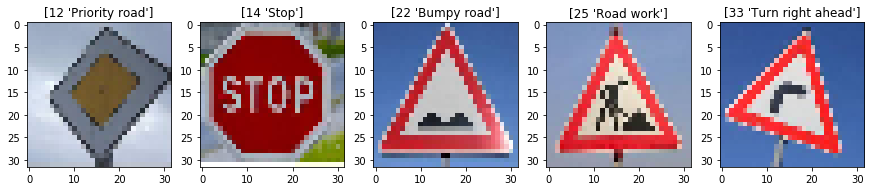

Images resized to 32x32 and smoothend


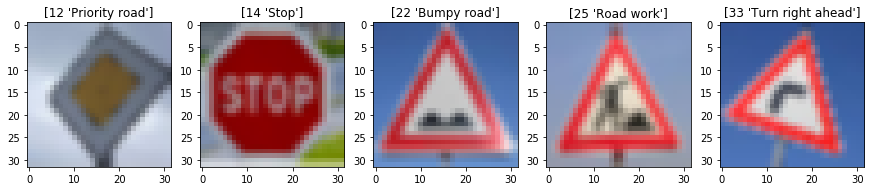

Images resized to 32x32, smoothend and normalized


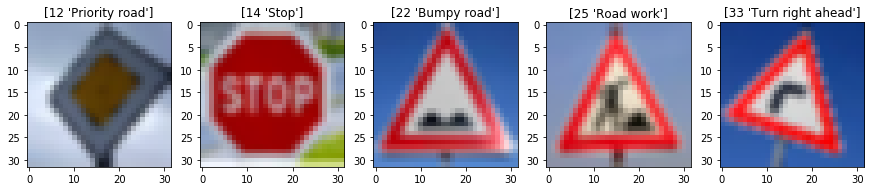

In [83]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
from skimage import transform

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

#Initialize the internet images test array.
#my_images = np.zeros([5, 32, 32, 3], dtype=np.uint8)
my_images = []
my_images_raw = []
my_images_resized = []
my_images_gaussian = []
my_labels=[12,14,22,25,33]
#print(my_labels[0]) # ) 12
testfiles = os.listdir("own-trafficsigns/")
i=1
plt.figure(figsize=(15,5))
for pic in testfiles:        
    image = mpimg.imread('own-trafficsigns/' + pic)   
    plt.subplot(1,5,i)
    plt.title(pic)
    plt.imshow(image)
    my_images_raw.append(image)
    i+=1
plt.show()

print('Images resized to 32x32')
i=0
plt.figure(figsize=(15,5))
for image in my_images_raw:        
    image = transform.resize(image,(32,32), order=3,mode='constant')
    plt.subplot(1,5,i+1)
    plt.title(signs.values[my_labels[i]])
    plt.imshow(image)
    my_images_resized.append(image)
    i+=1
plt.show()


print('Images resized to 32x32 and smoothend')
i=0
plt.figure(figsize=(15,5))
for image in my_images_resized:        
    image = gaussian_blur(image,3)
    plt.subplot(1,5,i+1)
    plt.title(signs.values[my_labels[i]])
    plt.imshow(image)
    my_images_gaussian.append(image)
    i+=1
plt.show()

print('Images resized to 32x32, smoothend and normalized')
i=0
plt.figure(figsize=(15,5))
for image in my_images_gaussian:        
    image = normalize(image)
    plt.subplot(1,5,i+1)
    plt.title(signs.values[my_labels[i]])
    plt.imshow(image)
    my_images.append(image)
    i+=1
plt.show()


### Predict the Sign Type for Each Image ###

In [84]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Predictions for own images

#my_labels=[33,25,12,22,14] # AWS Linux
my_labels=[12,14,22,25,33] # windows

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))    
    prediction=tf.argmax(logits,1)
    predictions = prediction.eval(feed_dict={x: my_images, keep_prob: 1}, session=sess)
    print("Predictions = ", predictions)

i=0;

for pre in predictions:
    print()
    print('Prediction = ', signs.values[pre]) # OK
    print('Correct = ',signs.values[my_labels[i]])    

    i=i+1
    
#for i, pre in enumerate(predictions):
#    print('\nPrediction = ', signs.values[pre], ' \nActual Sign = ',signs.values[my_labels[i]])    
    
    

INFO:tensorflow:Restoring parameters from .\lenet
Predictions =  [12 14 22 25  5]

Prediction =  [12 'Priority road']
Correct =  [12 'Priority road']

Prediction =  [14 'Stop']
Correct =  [14 'Stop']

Prediction =  [22 'Bumpy road']
Correct =  [22 'Bumpy road']

Prediction =  [25 'Road work']
Correct =  [25 'Road work']

Prediction =  [5 'Speed limit (80km/h)']
Correct =  [33 'Turn right ahead']


### 3.2 Analyze Performance

In [85]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    my_accuracy = evaluate(my_images, my_labels)
    print("Test Accuracy = {:.3f}".format(my_accuracy))
    

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.800


Except the last sign (right curve) every sign was predicted wiht a 100% probability.  
The error in prediction of the last sign may result in it's large rotation. The Network was trained with  +/- 15 degree rotated images. 
Adding more training images with greater rotations could improve the predictions further.


### 3.3 Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from .\lenet


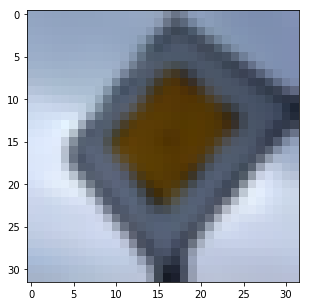

This is: Priority road
Predicted was:
                100.00% - Priority road
                  0.00% - Traffic signals
                  0.00% - No passing for vehicles over 3.5 metric tons
                  0.00% - No passing
                  0.00% - End of no passing


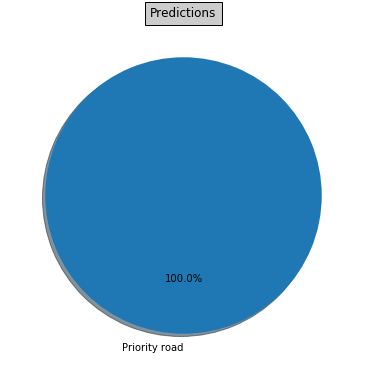

------------------------------------------


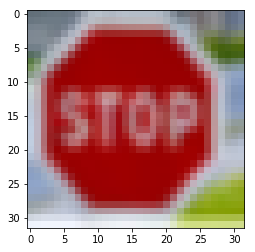

This is: Stop
Predicted was:
                100.00% - Stop
                  0.00% - No vehicles
                  0.00% - Yield
                  0.00% - No entry
                  0.00% - Road work


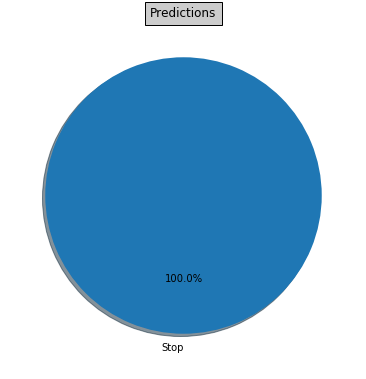

------------------------------------------


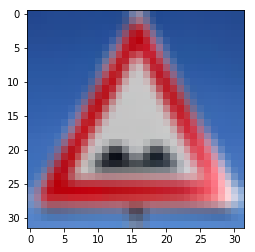

This is: Bumpy road
Predicted was:
                100.00% - Bumpy road
                  0.00% - Bicycles crossing
                  0.00% - Yield
                  0.00% - Road work
                  0.00% - General caution


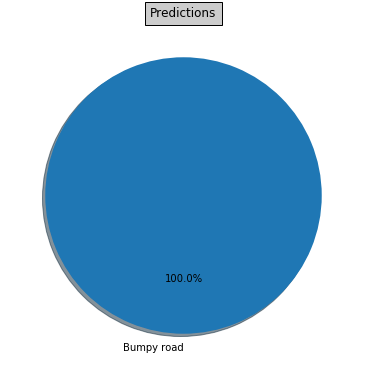

------------------------------------------


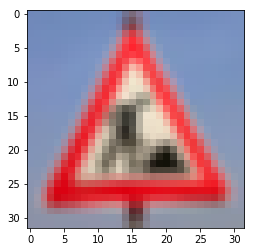

This is: Road work
Predicted was:
                100.00% - Road work
                  0.00% - Speed limit (80km/h)
                  0.00% - Bicycles crossing
                  0.00% - No passing for vehicles over 3.5 metric tons
                  0.00% - Speed limit (20km/h)


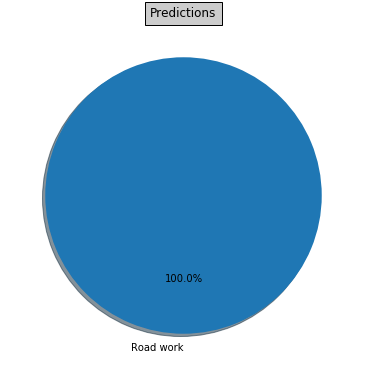

------------------------------------------


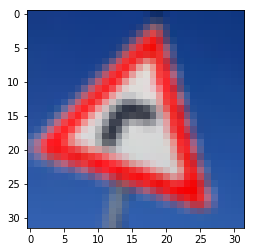

This is: Turn right ahead
Predicted was:
                 56.67% - Speed limit (80km/h)
                 26.33% - Speed limit (120km/h)
                 15.45% - Beware of ice/snow
                  1.00% - Speed limit (20km/h)
                  0.55% - Speed limit (100km/h)


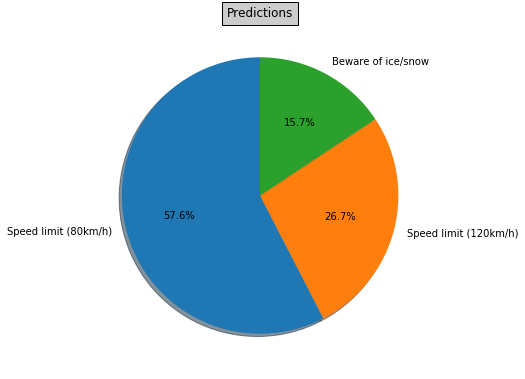

------------------------------------------


In [88]:
# Calculate top 5 soft max probabilities for internet images
softmax = tf.nn.softmax(logits=logits, name='softmax')
Top5_Softmax = tf.nn.top_k(softmax, k=5)
 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    plt.figure(figsize=(15,5))
    # Get softmax top 5 for each image
    for i in range(len(my_images)):
      
        plt.imshow( my_images[i])
        plt.show()
        top = sess.run(Top5_Softmax, feed_dict={x: my_images, y: my_labels, keep_prob: 1})
        print("This is:", signs.values[my_labels[i],1])
        print("Predicted was:")
        
        figure(i, figsize=(6,6))
        ax = axes([0.1, 0.1, 0.8, 0.8])
        labels=[]
        fracs=[]
        for j in range(5):            
            print("%22.2f%% - %s" % (top[0][i][j]*100, signs.values[top[1][i][j],1]))
            
            if top[0][i][j] > 0.01:
                fracs.append( top[0][i][j]*100 )
                labels.append( signs.values[top[1][i][j],1] )
        pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)# The default startangle is 0
        title('Predictions', bbox={'facecolor':'0.8', 'pad':5})
        show()
        print('------------------------------------------')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [20]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
## not working
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap('./own-trafficsigns/12_priority_road.jpg', 'conv2', activation_min=-1, activation_max=-1 ,plt_num=1)
    